# Adding J2 to Phoebe

In Phoebe (https://www.phoebe-project.org/), it is necessary to model stellar systems, which are massive, compact, and with rotating components. Generally, this problem is too complex, because each star is distorted by a Roche-like potential (Horvath et al. 2020). Nevertheless, a useful approximation might be that each star is described by oblateness (J2), which acts preferentially on the closest components. Each pair of stars is thus assumed to have the rotatonal axes perpendicular to the orbital plane (e.g., Fabrycky 2010). To this point, one can use an alternative implementation of the J2 force shown here.

Let's start with a standard setup:

In [40]:
import rebound
from math import pi
sim = rebound.Simulation()
sim.add(m = 1.)
sim.add(m = 3.e-6, a = 1., e = 0.01, inc = 0.0)
sim.move_to_com()

Add the J2 force:

In [41]:
import reboundx
rebx = reboundx.Extras(sim)
j2 = rebx.load_force("j2")
rebx.add_force(j2)

And the respective J2 value (unitless) and equatorial radius (au):

In [42]:
sim.particles[0].params["J2"] = 0.01
sim.particles[0].params["R_eq"] = 1/200.

We integrate as normal:

In [43]:
import numpy as np

times = np.linspace(0, 1.e4, 100)
omegas = np.zeros(len(times))
Omegas = np.zeros(len(times))

for i, time in enumerate(times):
    sim.integrate(time)
    omegas[i] = sim.particles[1].omega
    Omegas[i] = sim.particles[1].Omega

print("omega = ", omegas[-1])
print("Omega = ", Omegas[-1])

omega =  0.007477664536290618
Omega =  0.0


Note: Omega does not evolve in our 'j2' model, since the oblateness is always aligned with the orbit.

Finally, let's plot the corresponding precession of omega, Omega:

Text(0, 0.5, 'omegas, Omegas [rad]')

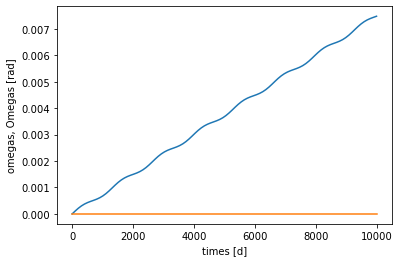

In [44]:
import matplotlib.pyplot as plt

plt.plot(times, omegas)
plt.plot(times, Omegas)
plt.xlabel("times [d]")
plt.ylabel("omegas, Omegas [rad]")

As a verification, we also compute precession rates using analytical formulae (e.g., Oplistilova et al. 2020, Appendix A):

In [45]:
from math import sqrt, cos

G = sim.G
a1 = sim.particles[1].a
e1 = sim.particles[1].e
i1 = sim.particles[1].inc
m1 = sim.particles[0].m
m2 = sim.particles[1].m
n1 = sqrt(G*(m1+m2)/a1**3)
eta1 = sqrt(1.-e1**2)
J2 = sim.particles[0].params["J2"]
R1 = sim.particles[0].params["R_eq"]

print("a1 = ", a1, " au")
print("e1 = ", e1)
print("i1 = ", i1, "rad")
print("m1 = ", m1, "M_S")
print("m2 = ", m2, "M_S")
print("n1 = ", n1, "rad (y/(2pi))^-1")
print("eta1 = ", eta1)
print("J2 = ", J2)
print("R1 = ", R1, "au")

omegadot1 = 3.*n1*J2*(R1/a1)**2 * (5.*(cos(i1))**2-1.)/(4.*eta1**4)
Omegadot1 = -3./2.*n1*J2*(R1/a1)**2 * cos(i1)/eta1**4
omega1 = omegadot1*times[-1]
Omega1 = Omegadot1*times[-1]

print("omegadot1 = ", omegadot1, " rad (y/(2pi))^-1")
print("Omegadot1 = ", Omegadot1, " rad (y/(2pi))^-1")
print("omega1 = ", omega1, " rad")
print("Omega1 = ", Omega1, " rad")

a1 =  0.9999999707710963  au
e1 =  0.009998538594536205
i1 =  0.0 rad
m1 =  1.0 M_S
m2 =  3e-06 M_S
n1 =  1.000001543842298 rad (y/(2pi))^-1
eta1 =  0.9999500133636549
J2 =  0.01
R1 =  0.005 au
omegadot1 =  7.501511806163473e-07  rad (y/(2pi))^-1
Omegadot1 =  -3.7507559030817365e-07  rad (y/(2pi))^-1
omega1 =  0.007501511806163473  rad
Omega1 =  -0.0037507559030817367  rad


Note: These formulae are dependent on inclination w.r.t. the z-axis, however, our 'j2' model is not.